In [1]:
import os, sys
sys.path.insert(1, os.path.abspath('..'))

from eustats import *

In [2]:
# Create a dictionary with EU NUTS2 regions
regions = {}
for item in countries.values():
    regions.update(codes[item])

In [3]:
# Get Regional GDP
def get_gdp_region():
    params = {'unit': 'MIO_EUR', 'geo': list(regions.keys()), 'time': 2020}
    df = client.get_dataset('nama_10r_2gdp', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.set_index('region_name', inplace=True) 
    df.rename(columns = {'values': 'GDP'}, inplace = True)
    df['GDP'] = df['GDP'] / 1000
    df = df[['GDP']]

    return df

In [4]:
# Get regional GDP per capita
def get_gdp_capita_region():
    params = {'unit': 'EUR_HAB', 'time': 2020,
              'geo': list(regions.keys())}
    df = client.get_dataset('nama_10r_2gdp', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.set_index('region_name', inplace=True) 
    df.rename(columns = {'values': 'GDP per Capita'}, inplace = True)
    df = df[['GDP per Capita']]
    
    return df


In [5]:
# Get regional Unemployment
def get_unemployment_region():
    params = {'sex': 'T', 'geo': list(regions.keys()), 'time': 2021,
              'age': 'Y15-74', 'isced11': 'TOTAL'} 
    df = client.get_dataset('lfst_r_lfu3rt', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'Unemployment %'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['Unemployment %']]
    
    return df


In [6]:
# Get life expectancy
def get_life_expectancy():
    params = {'sex': 'T', 'geo': list(regions.keys()), 'time': 2020}
    df = client.get_dataset('tgs00101', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'Life Expectancy'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['Life Expectancy']]
    
    return df

In [7]:
# Tertiary Educational attainment

def get_tertiary_education():
    params = {'sex': 'T', 'geo': list(regions.keys()), 'time': 2020}
    df = client.get_dataset('tgs00109', params).to_dataframe()
    df.dropna(inplace = True)
    df['region_name'] = df['geo'].apply(lambda x: regions[x])
    df.rename(columns = {'values': 'Tertiary Educational Attainment %'}, inplace = True)
    df.set_index('region_name', inplace=True) 
    df = df[['Tertiary Educational Attainment %']]
    
    return df

In [8]:
df = get_gdp_region()
df = df.join(get_gdp_capita_region())
df = df.join(get_unemployment_region())
df = df.join(get_life_expectancy())
df = df.join(get_tertiary_education())
df.dropna(inplace = True)

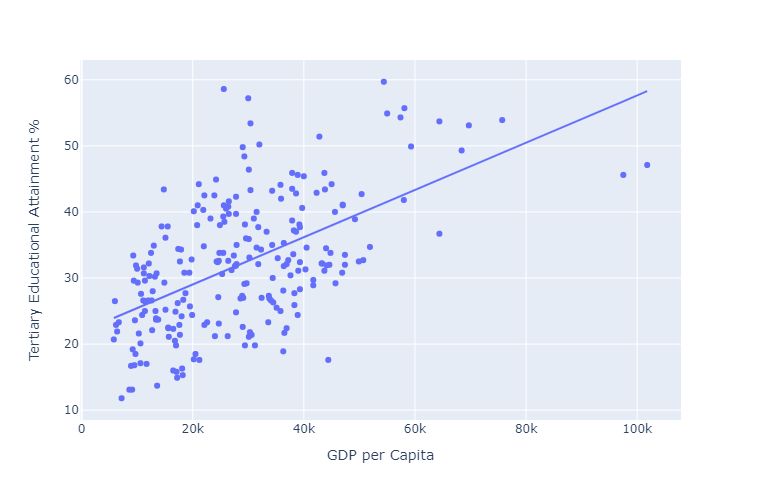

In [18]:
df.plot(kind = 'scatter', backend = 'plotly',
        x = 'GDP per Capita', y = 'Tertiary Educational Attainment %',
        trendline = 'ols',
        height = 500)